In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df2 = pd.read_csv("ks-projects-201801.csv", sep=",", header=None, engine='python') 

In [3]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
# pd.set_option('display.max_rows', 7500)
# pd.set_option('display.max_columns', 106)
#df2.head(5)

In [4]:
df2.isnull().sum()

0
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df2 = df2.dropna(axis=0)
#df3.head(5)

In [6]:
# Cleaning Check
df2.isnull().sum()

0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [7]:
df4=df2

In [8]:
# EDA

In [8]:
df7 = df2

In [9]:
le = preprocessing.LabelEncoder()
df7['backers'] = le.fit_transform(df7.backers.values)
df7['pledged'] = le.fit_transform(df7.pledged.values) 
df7['usd_pledged'] = le.fit_transform(df7.usd_pledged.values) 
df7['usd_pledged_real'] = le.fit_transform(df7.usd_pledged_real.values) 
df7['usd_goal_real'] = le.fit_transform(df7.usd_goal_real.values) 

In [10]:
train = df7
test = df7.drop(columns = ['state'], axis = 1)

In [11]:
train_original = train.copy()
test_original = test.copy()

In [12]:
train.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object', name=0)

In [13]:
test.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object', name=0)

In [14]:
train.dtypes

0
ID                  object
name                object
category            object
main_category       object
currency            object
deadline            object
goal                object
launched            object
pledged              int32
state               object
backers              int32
country             object
usd_pledged          int32
usd_pledged_real     int32
usd_goal_real        int32
dtype: object

In [15]:
print('Training data shape: ', train.shape)
train.head(5)

Training data shape:  (374860, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0,failed,0,GB,0,0,9237
2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,24896,failed,670,US,231,41682,23175
3,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,22380,failed,2018,US,34037,37381,32144
4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1,failed,1,US,52,54,34537
5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,7559,canceled,550,US,11241,12325,14285


In [16]:
print('Test data shape: ', test.shape)
test.head(5)

Test data shape:  (374860, 14)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0,0,GB,0,0,9237
2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,24896,670,US,231,41682,23175
3,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,22380,2018,US,34037,37381,32144
4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1,1,US,52,54,34537
5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,7559,550,US,11241,12325,14285


In [17]:
train["state"].size

374860

In [18]:
train["state"].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [19]:
# Normalize can be set to True to print proportions instead of number 
train["state"].value_counts(normalize=True)*100

failed        52.715947
successful    35.706931
canceled      10.339060
live           0.746412
suspended      0.491650
Name: state, dtype: float64

<AxesSubplot:title={'center':'State'}>

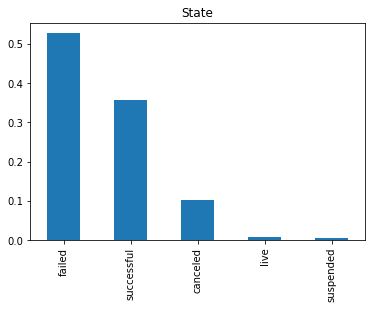

In [20]:
train["state"].value_counts(normalize=True).plot.bar(title = 'State')

In [21]:
train["main_category"].value_counts()

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [22]:
train['main_category'].value_counts(normalize=True)*100

Film & Video    16.725177
Music           13.212933
Publishing      10.504989
Games            9.396841
Technology       8.686443
Design           8.020594
Art              7.510004
Food             6.562183
Fashion          6.085472
Theater          2.910953
Comics           2.886144
Photography      2.875207
Crafts           2.349944
Journalism       1.268207
Dance            1.004908
Name: main_category, dtype: float64

<AxesSubplot:title={'center':'Main Category'}>

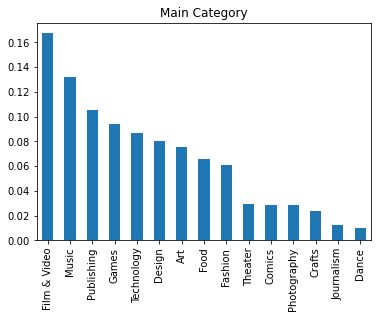

In [23]:
train['main_category'].value_counts(normalize=True).plot.bar(title= 'Main Category')

In [24]:
train["country"].value_counts()

US    292624
GB     33671
CA     14756
AU      7839
DE      4171
FR      2939
IT      2878
NL      2868
ES      2276
SE      1757
MX      1752
NZ      1447
DK      1113
IE       811
CH       761
NO       708
HK       618
BE       617
AT       597
SG       555
LU        62
JP        40
Name: country, dtype: int64

In [25]:
train['country'].value_counts(normalize=True)*100

US    78.062210
GB     8.982287
CA     3.936403
AU     2.091181
DE     1.112682
FR     0.784026
IT     0.767753
NL     0.765086
ES     0.607160
SE     0.468708
MX     0.467374
NZ     0.386011
DK     0.296911
IE     0.216347
CH     0.203009
NO     0.188871
HK     0.164862
BE     0.164595
AT     0.159259
SG     0.148055
LU     0.016540
JP     0.010671
Name: country, dtype: float64

<AxesSubplot:title={'center':'Country'}>

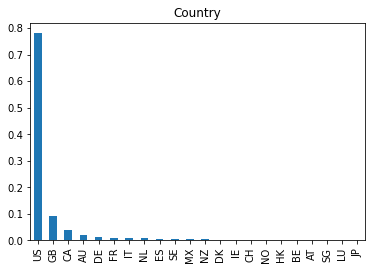

In [33]:
train['country'].value_counts(normalize=True).plot.bar(title= 'Country')


In [34]:
train["currency"].value_counts()

USD    292624
GBP     33671
EUR     17219
CAD     14756
AUD      7839
SEK      1757
MXN      1752
NZD      1447
DKK      1113
CHF       761
NOK       708
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [35]:
train['currency'].value_counts(normalize=True)*100

USD    78.062210
GBP     8.982287
EUR     4.593448
CAD     3.936403
AUD     2.091181
SEK     0.468708
MXN     0.467374
NZD     0.386011
DKK     0.296911
CHF     0.203009
NOK     0.188871
HKD     0.164862
SGD     0.148055
JPY     0.010671
Name: currency, dtype: float64

<AxesSubplot:title={'center':'Currency'}>

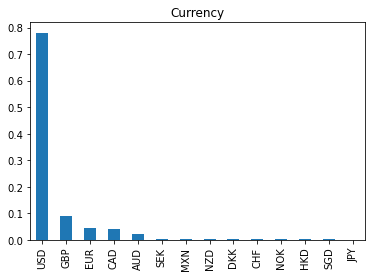

In [36]:
train['currency'].value_counts(normalize=True).plot.bar(title= 'Currency')

In [25]:
# Worldwide Pledged

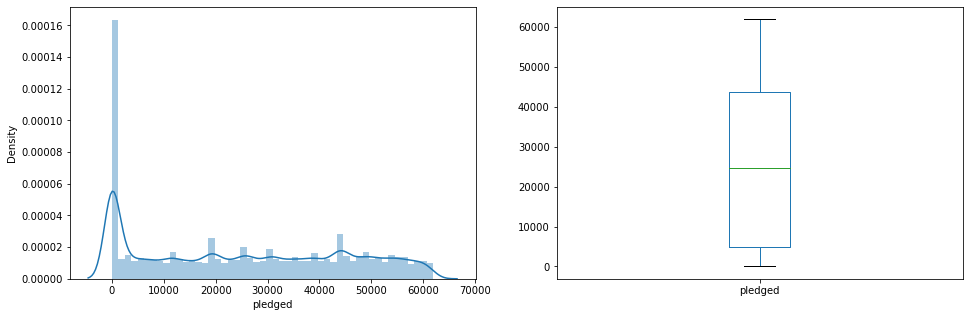

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["pledged"]);

plt.subplot(122)
train["pledged"].plot.box(figsize=(16,5))
plt.show()

In [27]:
# US Pledged

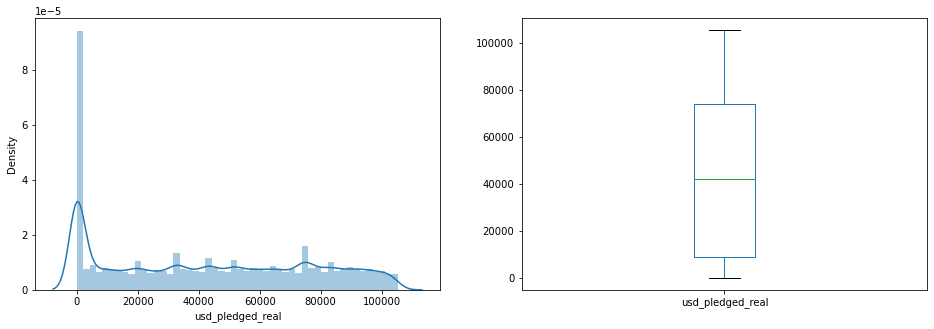

In [28]:
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['usd_pledged_real']);

plt.subplot(122)
train['usd_pledged_real'].plot.box(figsize=(16,5))

plt.show()

In [29]:
df7["state"].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

state          canceled  failed  live  successful  suspended
main_category                                               
Art                2222   14130   194       11510         96
Comics              842    4036    76        5842         23
Crafts              843    5703    76        2115         72
Dance               163    1235    18        2338         13
Design             4152   14814   305       10549        246
Fashion            2650   14181   250        5593        138
Film & Video       5744   32891   332       23612        117
Food               2209   15969   183        6085        153
Games              6199   16002   287       12518        219
Journalism          523    3136    31        1012         52
Music              3300   21696   281       24105        148
Photography         986    6384    48        3305         55
Publishing         3601   23113   299       12300         66
Technology         4715   20613   377        6433        424
Theater             608 

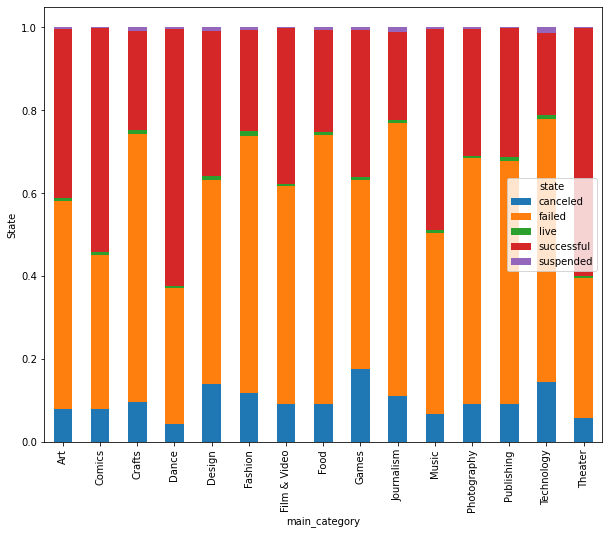

In [30]:
print(pd.crosstab(train["main_category"],train["state"]))
main_category = pd.crosstab(train["main_category"],train["state"])
main_category.div(main_category.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,8))
plt.xlabel("main_category")
plt.ylabel("State")
#plt.legend(['Faild', 'Successful', 'Canceled', 'Live', 'Suspended'], bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

state          canceled  failed  live  successful  suspended
main_category                                               
Art                2222   14130   194       11510         96
Comics              842    4036    76        5842         23
Crafts              843    5703    76        2115         72
Dance               163    1235    18        2338         13
Design             4152   14814   305       10549        246
Fashion            2650   14181   250        5593        138
Film & Video       5744   32891   332       23612        117
Food               2209   15969   183        6085        153
Games              6199   16002   287       12518        219
Journalism          523    3136    31        1012         52
Music              3300   21696   281       24105        148
Photography         986    6384    48        3305         55
Publishing         3601   23113   299       12300         66
Technology         4715   20613   377        6433        424
Theater             608 

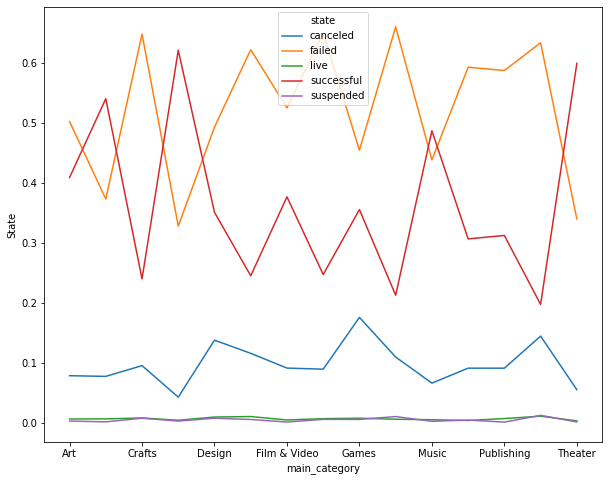

In [31]:
print(pd.crosstab(train["main_category"],train["state"]))
main_category = pd.crosstab(train["main_category"],train["state"])
main_category.div(main_category.sum(1).astype(float),axis=0).plot(kind="line",figsize=(10,8))
plt.xlabel("main_category")
plt.ylabel("State")
#plt.legend(['Faild', 'Successful', 'Canceled', 'Live', 'Suspended'], bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

In [32]:
# Bin Analysis

In [33]:
bins = [0,1000,3000,42000]
group=['Low','Average','High']
train["backers_bin"]=pd.cut(df["backers"],bins,labels=group)

state        canceled  failed  live  successful  suspended
backers_bin                                               
Low              8877   52660   742       33171        435
Average         12802   78453  1064       64058        582
High             5065   27861   444       36622        213


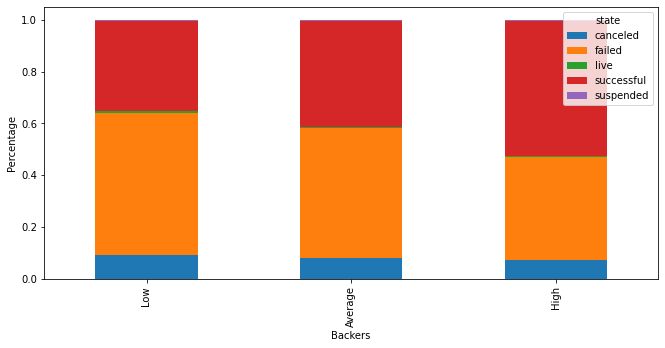

In [34]:
print(pd.crosstab(train["backers_bin"],train["state"]))
backers_bin = pd.crosstab(train["backers_bin"],train["state"])
backers_bin.div(backers_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("Backers")
plt.ylabel("Percentage")
plt.show()

In [35]:
bins = [0,1000,3000,42000]
group=['Low','Average','High']
train["usd_pledged_real_bin"]=pd.cut(df["pledged"],bins,labels=group)

state                 canceled  failed  live  successful  suspended
usd_pledged_real_bin                                               
Low                       2003   16791   153        3906        139
Average                    587    3092    60        5201         26
High                     15925   91659  1340       80488        692


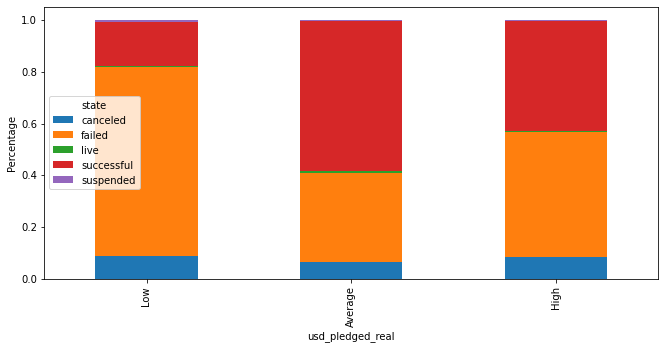

In [36]:
print(pd.crosstab(train["usd_pledged_real_bin"],train["state"]))
usd_pledged_real_bin = pd.crosstab(train["usd_pledged_real_bin"],train["state"])
usd_pledged_real_bin.div(usd_pledged_real_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("usd_pledged_real")
plt.ylabel("Percentage")
plt.show()

In [37]:
bins = [0,2500,4000,6000, 85000]
group=['Low','Average','High', 'Very High']
train["pledged_bin"]=pd.cut(df["pledged"],bins,labels=group)

state        canceled  failed  live  successful  suspended
pledged_bin                                               
Low              2445   19197   193        7941        160
Average           624    4012    61        3479         34
High              775    4230    56        4131         34
Very High       22900  131538  1940      118300       1002


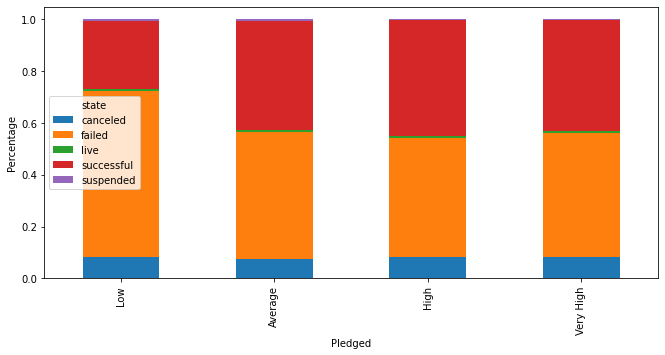

In [38]:
print(pd.crosstab(train["pledged_bin"],train["state"]))
pledged_bin = pd.crosstab(train["pledged_bin"],train["state"])
pledged_bin.div(pledged_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("Pledged")
plt.ylabel("Percentage")
plt.show()

In [39]:
bins = [0,25,100,250,500]
group=['Low','Average','High', 'Very High']
train["backers_bin"]=pd.cut(df["backers"],bins,labels=group)

country      AT    AU  BE    CA  CH   DE   DK   ES   FR    GB  ...   IT  JP  \
backers_bin                                                    ...            
Low          86  1030  90  1897  95  548  125  331  345  3833  ...  422   3   
Average       6    45   5    91   6   22    8   14   24   218  ...   12   0   
High         16   186  17   335   8   97   29   46   72   845  ...   56   2   
Very High    11   271  23   541  27  165   46   58  134  1366  ...   98   3   

country      LU   MX   NL  NO   NZ   SE  SG     US  
backers_bin                                         
Low           6  286  436  89  183  213  62  30764  
Average       0    0   17   3    6   11   6   2334  
High          0   33   52  12   23   46  10   8018  
Very High     2   46   92  20   47   92  23  12805  

[4 rows x 22 columns]


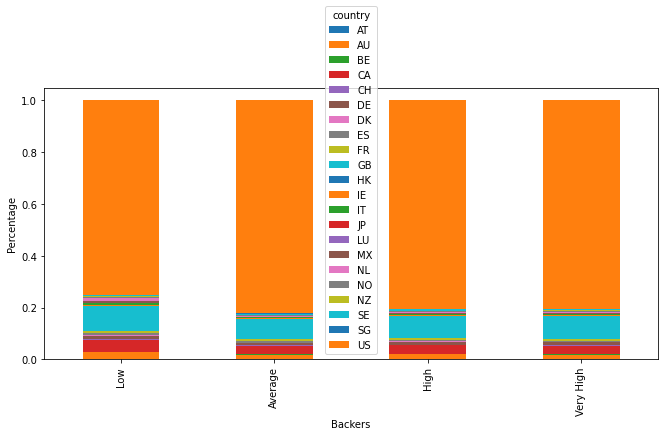

In [40]:
print(pd.crosstab(train["backers_bin"],train["country"]))
backers_bin = pd.crosstab(train["backers_bin"],train["country"])
backers_bin.div(backers_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("Backers")
plt.ylabel("Percentage")
plt.show()

In [41]:
bins = [0,25,100,250,500]
group=['Low','Average','High', 'Very High']
train["usd_pledged_real_bin"]=pd.cut(df["usd_pledged_real"],bins,labels=group)

country               AT   AU  BE   CA  CH   DE  DK   ES   FR   GB  ...   IT  \
usd_pledged_real_bin                                                ...        
Low                    0   14   0    2   0    0   2    0    0    0  ...    0   
Average               21  251  30  510  35  147  32  111  103  332  ...  142   
High                   4   88   3  136  14   29   9   18   11  655  ...   27   
Very High              1   15   1   27   5    8   2    4    5   60  ...    4   

country               JP  LU  MX   NL  NO  NZ  SE  SG    US  
usd_pledged_real_bin                                         
Low                    0   0  88    0  25  23  67   0     0  
Average                2   3  27  144  14  20  23   9  6588  
High                   1   0  22   15  10  13  17   1  6061  
Very High              0   0   1    1   0   2   1   0  1142  

[4 rows x 22 columns]


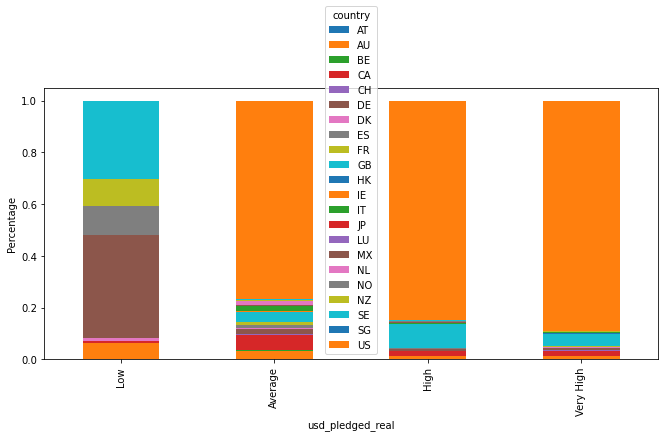

In [42]:
print(pd.crosstab(train["usd_pledged_real_bin"],train["country"]))
usd_pledged_real_bin = pd.crosstab(train["usd_pledged_real_bin"],train["country"])
usd_pledged_real_bin.div(usd_pledged_real_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("usd_pledged_real")
plt.ylabel("Percentage")
plt.show()

In [43]:
bins = [0,25,100,250,500]
group=['Low','Average','High', 'Very High']
train["pledged_bin"]=pd.cut(df["pledged"],bins,labels=group)

country      AT   AU  BE   CA  CH   DE  DK   ES   FR   GB  ...   IT  JP  LU  \
pledged_bin                                                ...                
Low          21  250  30  510  35  147   0  111  103  909  ...  142   0   3   
Average      14  192  17  370  21  105  34   63   56  827  ...   93   2   1   
High          0   17   1   23   1    5   1    2    3   71  ...    4   0   0   
Very High     5   43   3   63   4   18   5   13   15  152  ...   12   0   0   

country       MX   NL  NO  NZ  SE  SG    US  
pledged_bin                                  
Low            0  144   0  37   0   0  6599  
Average      148   69  18  46  52   8  6784  
High           1    9   0   0   0   1   541  
Very High      9   10   4  14   9   2  1483  

[4 rows x 22 columns]


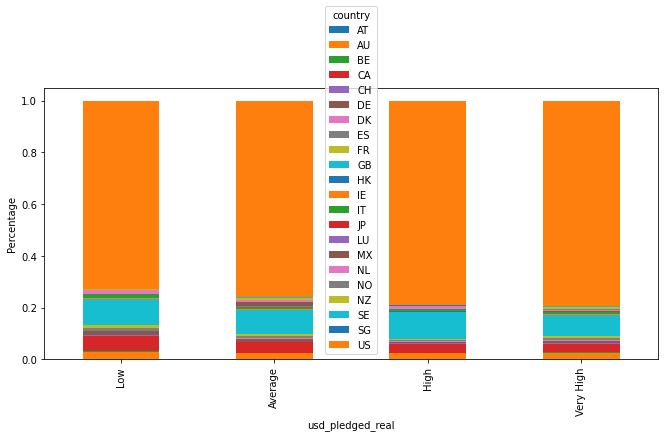

In [44]:
print(pd.crosstab(train["pledged_bin"],train["country"]))
pledged_bin = pd.crosstab(train["pledged_bin"],train["country"])
pledged_bin.div(pledged_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(11,5))
plt.xlabel("usd_pledged_real")
plt.ylabel("Percentage")
plt.show()

In [87]:
# train=train.drop(["backers_bin","usd_pledged_real_bin","pledged_bin"],axis=1)
# test=test.drop(["backers_bin","usd_pledged_real_bin","pledged_bin"],axis=1)

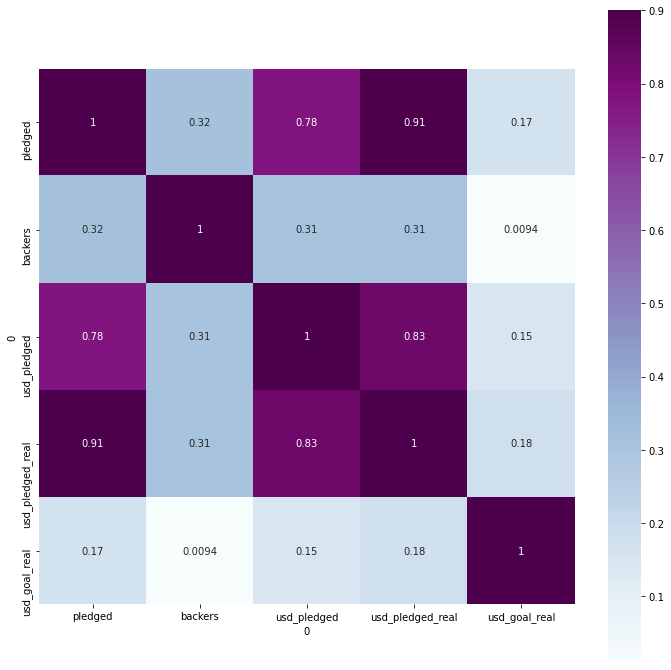

In [46]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(matrix, vmax=.9, square=True, cmap="BuPu",annot=True);

In [47]:
train.isnull().sum()

0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [48]:
test.isnull().sum()

0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<AxesSubplot:>

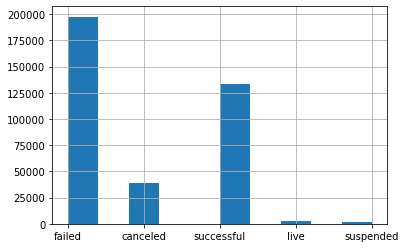

In [49]:
train['state'].hist(bins=10)

In [50]:
# Modeling

In [51]:
train=train.drop(columns = ["ID", "name"],axis=1).sample(20000)
test=test.drop(columns = ["ID", "name"],axis=1).sample(20000)

In [52]:
train.head(3)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
366409,Country & Folk,Music,USD,10/21/2012,5500,9/21/2012 21:06,54047,failed,792,US,82423,91182,36674
102108,Webseries,Film & Video,CAD,4/11/2014,3000,3/13/2014 20:44,33312,successful,3282,CA,45736,50886,21357
243585,Food,Food,GBP,12/27/2016,10000,11/27/2016 22:10,2547,successful,288,GB,6507,13769,4751


In [53]:
test.head(3)

,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
78822,Crafts,Crafts,GBP,9/21/2014,500,8/22/2014 18:38,0,0,GB,0,0,45681
79892,Film & Video,Film & Video,USD,3/23/2014,5000,3/3/2014 14:27,0,0,US,0,0,34537
30759,Apparel,Fashion,EUR,7/6/2016,3500,5/11/2016 18:19,0,0,ES,0,0,28904


In [54]:
X=train.drop("state",1)

In [55]:
y=train[["state"]]

In [56]:
y.head(5)

,state
366409,failed
102108,successful
243585,successful
97344,failed
356531,failed


In [57]:
X = pd.get_dummies(X)

In [58]:
X.head(5)

,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
366409,54047,792,82423,91182,36674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102108,33312,3282,45736,50886,21357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243585,2547,288,6507,13769,4751,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97344,19229,2,29760,32601,23170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
356531,37586,2,24408,62740,41910,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [60]:
train

,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
366409,54047,792,82423,91182,36674,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
102108,33312,3282,45736,50886,21357,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243585,2547,288,6507,13769,4751,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97344,19229,2,29760,32601,23170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
356531,37586,2,24408,62740,41910,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237164,33361,2388,50369,55577,13086,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
133023,1,1,52,54,19526,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59140,32199,2242,48721,53702,23170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
375955,39367,3189,69220,73611,7842,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test

,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
78822,0,0,0,0,45681,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79892,0,0,0,0,34537,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30759,0,0,0,0,28904,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
282964,26833,152,17112,44828,34527,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
339817,19216,1229,0,37324,39170,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223496,46903,3603,71313,78858,34537,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
82977,42312,2832,38510,81389,27997,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121810,59333,301,90926,100438,10846,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
357745,56792,910,86930,96073,34537,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.40,random_state=1)

In [63]:
# Logistic Regression

In [64]:
logistic_model = LogisticRegression(random_state=1)

In [65]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [66]:
pred_cv_logistic=logistic_model.predict(x_cv)

In [67]:
score_logistic =accuracy_score(pred_cv_logistic,y_cv)*100 

In [68]:
score_logistic

54.7875

In [69]:
#pred_test_tree = tree_model.predict(test)

In [70]:
# Random Forest

In [71]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [72]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [73]:
pred_cv_forest=forest_model.predict(x_cv)

In [74]:
score_forest = accuracy_score(pred_cv_forest,y_cv)*100

In [75]:
score_forest

53.125

In [76]:
#pred_test_forest=forest_model.predict(test)

In [77]:
# Random Forest with Grid-search

In [78]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [79]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [80]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [81]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=19, n_estimators=21, random_state=1)

In [82]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=3,n_estimators=101)

In [83]:
grid_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=101, random_state=1)

In [84]:
pred_grid_forest = grid_forest_model.predict(x_cv)

In [85]:
score_grid_forest = accuracy_score(pred_grid_forest,y_cv)*100

In [86]:
score_grid_forest

53.125

In [ ]:
#pred_grid_forest_test = grid_forest_model.predict(test)